### ANALYSIS OF THE SPECTROGRAM FOR DIFFERENT AUDIO SIGNALS

In [1]:
import numpy as np 
from scipy.io import wavfile
import IPython
import matplotlib.pyplot as plt
import pyroomacoustics as pra

##### Compute the spectrogram of an audio file 

In [31]:
def compute_spectrogram(audio_file, low_pass=False):
    fs, signal = wavfile.read(audio_file)
    
    #check if we have a stereo signal
    if signal.shape[1]>1:
        signal = signal[:,0] # take only one signal and drop the other one
    
    if low_pass:
        h_len = 50
        h = np.ones(h_len)
        h /= np.linalg.norm(h)

        
        # stft paramaters 
        fft_len = 512 
        block_size = fft_len - 50 + 1
        hop = block_size // 2
        window = pra.hann(block_size, flag='asymmetric', length='full') 

        stft = pra.realtime.STFT(block_size, hop=hop, analysis_window=window, channels=1)
        stft.set_filter(h, zb=h.shape[0] - 1)  
        processed_audio = np.zeros(signal.shape)
        n = 0
        while  signal.shape[0] - n > hop:
            stft.analysis(signal[n:n+hop,])
            stft.process()  # apply the filter
            processed_audio[n:n+hop,] = stft.synthesis()
            n += hop
            
        fig = plt.figure()
        fig.set_size_inches(20,8)
        plt.subplot(2,1,1)
        plt.specgram(signal[:n-hop].astype(np.float32), NFFT=256, Fs=fs, vmin=-20, vmax=30) # dBFS scale
        plt.title('Original Signal', fontsize=22)
        plt.subplot(2,1,2)
        plt.specgram(processed_audio[hop:n], NFFT=256, Fs=fs, vmin=-20, vmax=30) # dBFS scale
        plt.title('Lowpass Filtered Signal', fontsize=22)
    
    else:
        fig = plt.figure()
        fig.set_size_inches(20,8)
        plt.specgram(signal.astype(np.float32), NFFT=256, Fs=fs, vmin=-20, vmax=30) # dBFS scale
        plt.title('Spectrogram of '+audio_file[:-4], fontsize=22)

    
    

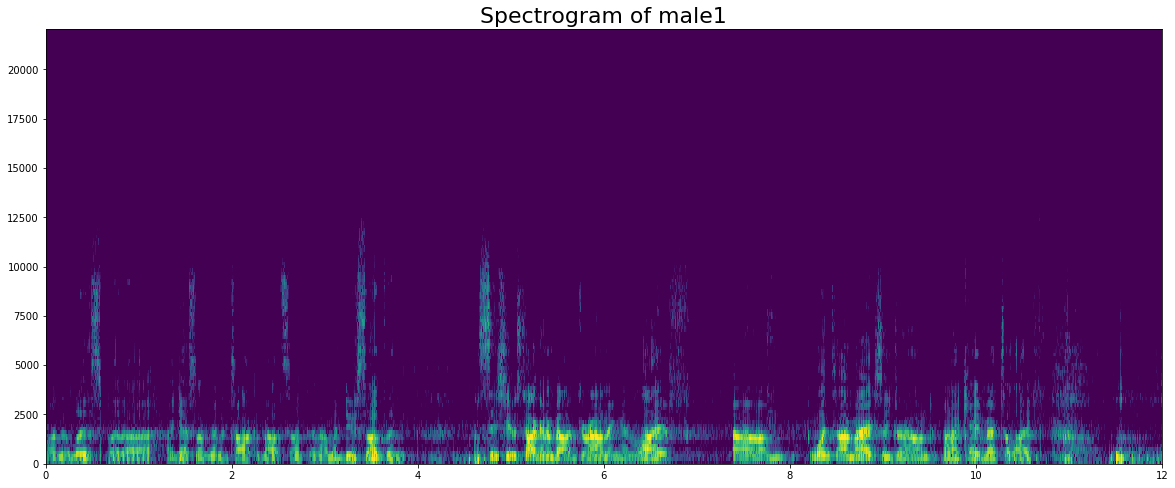

In [32]:
compute_spectrogram("male1.wav")

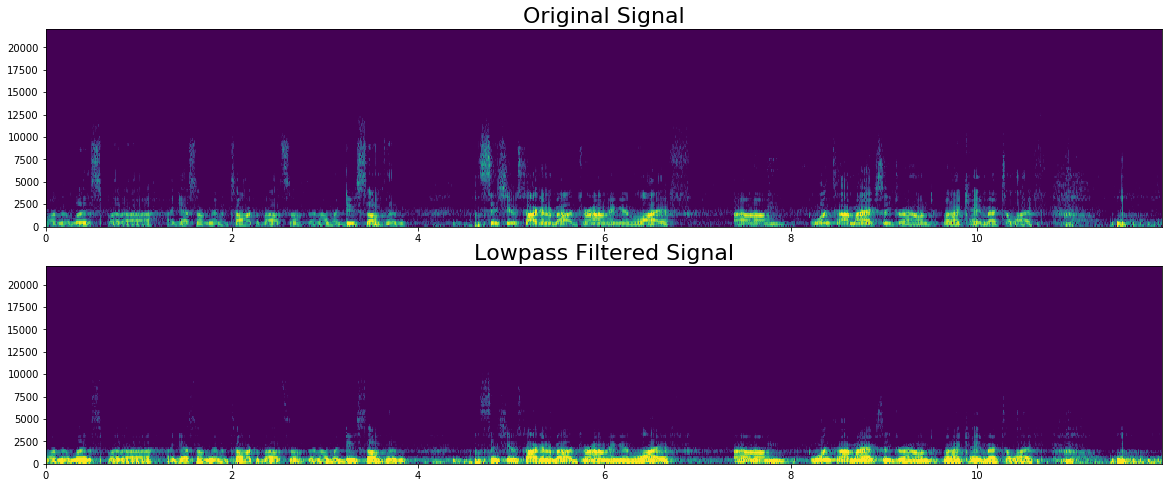

In [34]:
compute_spectrogram("male1.wav",True)